# Introduction to Gradient Descent

## Introduction 

It's possible to solve for the optimal values of a regression using closed-form Ordinary Least Squares programming when there are a limited number of features, but this process might become computationally expensive when there are many features. Therefore, iterative algorithms like the *gradient descent* algorithm are the basis of many models in statistics and machine learning!

You previously saw how after choosing the slope and y-intercept values of a regression line, we can calculate the residual sum of squares (RSS) and related root mean squared error. We can use either the RSS or RMSE to calculate the accuracy of a line. In this lesson, we'll use the RSS to iteratively find the best fit line for our problem at hand!

Once calculating the accuracy of a line, we are pretty close to improving upon a line by minimizing the RSS.  This is the task of the gradient descent technique.  But before learning about gradient descent, let's review and ensure that we understand how to evaluate how our line fits our data.  
## Objectives
You will be able to:
* Describe what gradient descent is, and its relationship to minima
* Describe a cost curve and what it means to move along it

## Review of plotting our data and a regression line
For this example, let's imagine that we have a predictor $x$ and a dependent variable $y$. We construct our data in a way that we know that the "actual" line that we're looking at has an 
- intercept, $\beta_0$ equal to 3 (which we will refer to as $b$ when estimating it)
- $\beta_1$ equal to 50 (which we will refer to as $m$ when estimating it)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(225)

x = np.random.rand(30, 1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.plot(x, y, '.b')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

Let's again come up with some numbers for a slope and a y-intercept.  

>One (not so great) technique to get the slope, is by drawing a line between the first and last points.  And from there, we calculate the value of $b$.  You can use the `build_regression_line` function, defined in our linear_equations library, `linear_equatuions.py`, which quickly does this for us.

In [3]:
from linear_equations import build_regression_line

Let's pass $x$ and $y$ into our `build_regression_line` function. 

In [4]:
build_regression_line(x,y)

{'slope': 54.550106055369, 'int': 1.3188915249780635}

Turning this into a regression formula, we have the following.

In [5]:
def regression_formula(x):
    return 1.319 + 54.550*x

Let's plot this regression formula with our data to get a sense of what it looks like. 

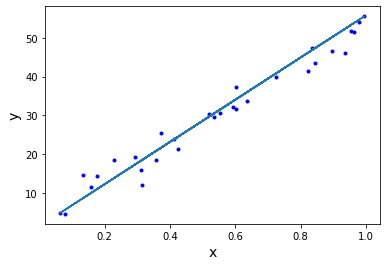

In [6]:
np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

## Evaluating the regression line
From there, we can calculate the `residual sum of squared errors` and the `root mean squared error`.

In [7]:
import math

def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return np.round(errors(x_values, y_values, m, b)**2, 2)

def residual_sum_squares(x_values, y_values, m, b):
    return round(sum(squared_errors(x_values, y_values, m, b)), 2)

def root_mean_squared_error(x_values, y_values, m, b):
    return round(math.sqrt(sum(squared_errors(x_values, y_values, m, b)))/len(x_values), 2)

squared_errors(x, y, 54.550, 1.319 )

array([ 4.44,  0.84, 20.68, 14.68,  2.43, 13.23, 10.31, 10.61,  1.2 ,
        2.04, 38.08,  5.67, 15.21,  0.43,  2.41, 23.48, 37.39,  4.93,
        0.38,  0.7 ,  0.  ,  0.  ,  5.65,  6.94, 40.66,  0.23,  0.89,
        0.  , 11.44,  5.04])

In [8]:
residual_sum_squares(x, y, 54.550, 1.319) 

279.99

In [9]:
root_mean_squared_error(x, y, 54.550, 1.319) 

0.56

We can see that the RSS is equal to 279.99 and the RMSE is 0.56 for our regression line! Do you think we can do better?
### Moving towards gradient descent
Now that we have the residual sum of squares function to evaluate the accuracy of our regression line, we can simply try out different regression lines and use the regression line that has the lowest RSS.  The regression line that produces the lowest RSS for a given dataset is called the "best fit" line for that dataset.  
​
So this will be our technique for finding our "best fit" line:
​
> * Choose a regression line with a guess of values for $m$ and $b$
> * Calculate the RSS
> * Adjust $m$ and $b$, as these are the only things that can vary in a single-variable regression line.
> * Again calculate the RSS 
> * Repeat this process
> * The regression line (that is, the values of $b$ and $m$) with the smallest RSS is our **best fit line**
​
We'll eventually tweak and improve upon that process, but for now, it will do.  In fact, we will make things even easier at first by holding $b$ fixed to a constant value while we experiment with different $m$ values.  In later lessons, we will change both variables.
#### Updating the regression line to improve accuracy
Ok, so we have a regression line of $y = mx + b $, and we started with values of $b = 1.319 $ and $m = 54.550 $.  Then seeing how well this regression line matched our dataset, we calculated that $ RSS = 279.99 $.  Our next step is to plug in different values of $m$ and see how RSS changes.  Let's try $m$ = 54 instead of $54.550$.


In [10]:
residual_sum_squares(x, y, 54, 1.319)

257.35

We can see that the RSS is already lower here! Now let's the RSS for a variety of $m$ values. We'll look at $m$-values between 40 and 59.

In [11]:
table = np.zeros((20,2))
for idx, val in enumerate(range(40, 60)):
    table[idx,0] = val
    table[idx,1] = residual_sum_squares(x, y, val, 1.319)
    
table

array([[  40.  , 2012.31],
       [  41.  , 1738.24],
       [  42.  , 1487.03],
       [  43.  , 1258.71],
       [  44.  , 1053.31],
       [  45.  ,  870.75],
       [  46.  ,  711.05],
       [  47.  ,  574.3 ],
       [  48.  ,  460.37],
       [  49.  ,  369.35],
       [  50.  ,  301.17],
       [  51.  ,  255.89],
       [  52.  ,  233.49],
       [  53.  ,  234.  ],
       [  54.  ,  257.35],
       [  55.  ,  303.64],
       [  56.  ,  372.74],
       [  57.  ,  464.75],
       [  58.  ,  579.66],
       [  59.  ,  717.43]])

Notice what the above table represents.  While keeping our value of $b$ fixed at 1.319, we moved towards a smaller residual sum of squares (RSS) by changing our value of $m$, our slope. 

Setting $m$ to 54 produced a lower error than at 54.550.  We kept moving our $m$ value lower until we set $m$ = 52, at which point our error began to increase.  Therefore, we know that a value of $m$ between 52 and 53 produces the smallest RSS for our data while $b = 1.319$. 

This changing output of RSS based on a changing input of different regression lines is called our **cost function**.  Let's plot this chart to see it better.

We set:

* `m_values` as the input values (x values), and
* `rss_errors` as the output values (y values)

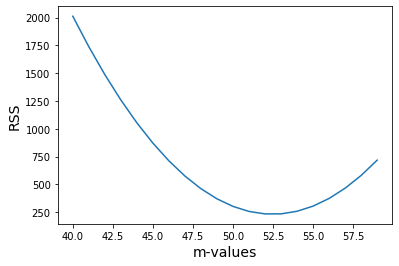

In [12]:
plt.plot(table[:,0], table[:,1], '-')
plt.xlabel("m-values", fontsize=14)
plt.ylabel("RSS", fontsize=14);

The graph above is called the **cost curve**.  It is a plot of the RSS for different values of $m$.    The curve demonstrates that when $m$ is between 52 and 53, the RSS is lowest.  This technique of optimizing towards a minimum value is called *gradient descent*.  Here, we *descend* along a cost curve.  As we change our variable, we need to stop when the value of our RSS no longer decreases.

Note that we end up with a m-value which is not quite the same as $m$ the value which generated the data. The reason for this is 2-fold:
- We used a value for $b$ which was equal to 1.319, which was quite far from the actual value of 3. Therefore, there is a measurement in error for the slope.
- Secondly, randomness was (intentionally) included in our data, so even with the best algorithm, we would come up with a value *close* to 50, but not exactly 50!

## Summary

In this section we saw the path from going from calculating the RSS for a given regression line, to finding a line that minimizes our RSS - a best fit line.  We learned that we can move to a better regression line by descending along our cost curve.  Going forward, we will learn how to move towards our best fit line in an efficient manner. 

# Gradient Descent: Step Sizes

## Introduction

In the last section, you took a first look at the process for improving regression lines.  You began with some data then used a simple regression line in the form $\hat{y}= mx + b $ to predict an output, given an input.  Finally, you measured the accuracy of your regression line by calculating the differences between the outputs predicted by the regression line and the actual values. In this lesson, you'll look at how we can make your approach more efficient.

## Objectives

You will be able to:

- Define step sizes in the context of gradient descent

- Define a learning rate, and its relationship to step size when performing gradient descent
- Plot visualizations of the process of gradient descent


## The best fit

In the last lesson, we quantified the accuracy of the regression line by squaring all of the errors (to eliminate negative values) and adding these squares together to get our residual sum of squares (RSS).  Armed with a number that describes the line's accuracy (or goodness of fit), we iteratively tried new regression lines by adjusting our slope value, $m$, and then comparing these RSS values.  By finding the values $m$ and $b$ that minimize the RSS, we can found our "best fit line". For our case, a slope $m$ of 52 gave the best fit line given that the intercept was kept constant.  

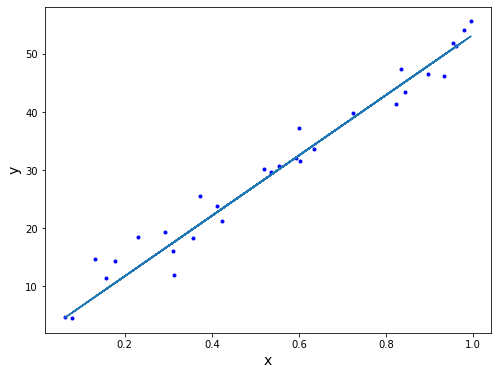

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def regression_formula(x):
    return 1.319 + 52*x

np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.figure(figsize=(8,6))
plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

In our cost function below, you can see the sequential values of $m$ and the related RSS values (given a constant value $b$).

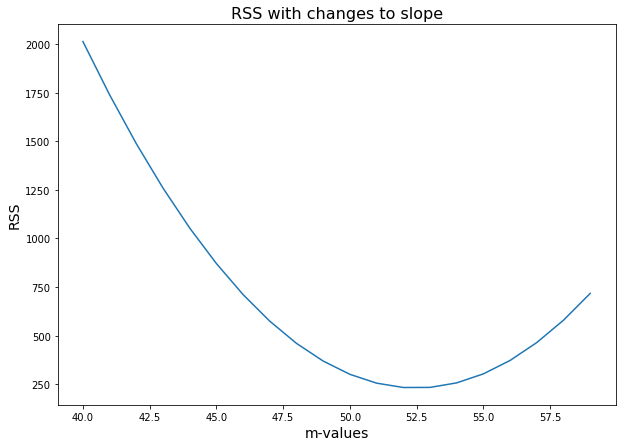

In [2]:
def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return np.round(errors(x_values, y_values, m, b)**2, 2)

def residual_sum_squares(x_values, y_values, m, b):
    return round(sum(squared_errors(x_values, y_values, m, b)), 2)


table = np.zeros((20,2))
for idx, val in enumerate(range(40, 60)):
    table[idx,0] = val
    table[idx,1] = residual_sum_squares(x, y, val, 1.319)
    
plt.figure(figsize=(10,7))
plt.plot(table[:,0], table[:,1], '-')
plt.xlabel("m-values", fontsize=14)
plt.ylabel("RSS", fontsize=14)
plt.title("RSS with changes to slope", fontsize=16);

> The bottom of the blue curve displays the $m$ value that produces the lowest RSS.

### Things are not so simple

At this point, our problem of finding the minimum RSS may seem simple.  For example, why not simply try **all** of the different values for the slope, and find the value where RSS is the lowest? 

So far, we have held one variable, the y-intercept, constant in order to experiment with the other. We need an approach that will continue to work as we change both of the variables in our regression line.  Altering the second variable makes things far more complicated.  Here is a quick look at our cost curve if we can change both our slope value $m$ *and* the y-intercept $b$:

<img src="./images/new_gradientdescent.png" width="600">

As we can see, exploring both variables (the slope and the y-intercept) requires plotting the second variable along the horizontal axis and turning our graph into a three-dimensional representation.  And in the future, we'll be able to change more than just that.  

Furthermore, because we need to explore multiple variables in our regression lines, we are forced to rule out some approaches that are more computationally expensive, or simply not possible.

* We **cannot** simply use the derivative (more on that later) to find the minimum.  Using that approach will be impossible in many scenarios as our regression lines become more complicated.
* We **cannot** alter all of the variables of our regression line across all points and calculate the result.  It will take too much time, as we have more variables to alter. 

However, we are on the right track by altering our regression line and calculating the resulting RSS values.

Remember in the last lesson, we evaluated our regression line by changing our slope by 1 to determine whether it produced a higher or lower RSS.  

| m       | residual sum of squared           | 
| ------------- |:-------------:| 
|  44  | 1053.31|
|  45  |  870.75|
| 46  |  711.05|
|  47  |  574.3 |
|48  |  460.37|
|49  |  369.35|
|  50  | 301.17|
|  51  |  255.89|
|  52  |  233.49|
|  53  |  234  |
|  54  | 257.35|
| 55  | 303.64|
|  56  |  372.74|

Rather than arbitrarily changing our variables, as we have done by decrementing the slope value $m$ by 1 in the example above, we need to move carefully down the cost curve to be certain that our changes are reducing the RSS.

### Our approach

We don't want to adjust the slope value $m$ or another variable and hope that the RSS decreased.  Doing so is like trying to fly a plane just by sitting down and pressing buttons.  

We want an approach that lets us be certain that we're moving in the right direction with every change.  Also, we want to know how much of a **change** to make to minimize RSS.  

> Let's call each of these changes a **step**, and the size of the change our **step size**. 

Our new task is to find step sizes that bring us to the best RSS quickly without overshooting the mark.

![](./images/aden-and-cree.jpg)

### The slope of the cost curve tells us our step size

Believe it or not, we can determine the proper step size just by looking at the slope of our cost function.

Imagine yourself standing on our cost curve like a skateboarder at the top of a halfpipe.  Even with your eyes closed, you could tell simply *by the way you tilted* whether to move forward or backward to approach the bottom of the cost curve.  

<img src="./images/snowboard.png" width="600">

* If the slope tilts downwards, then we should walk forward to approach the minimum.  
* And if the slope tilts upwards, then we should point walk backwards to approach the minimum.  
* The steeper the tilt, the further away we are from our cost curve's minimum, so we should take a larger step.  

So by looking to the tilt of a cost curve at a given point, we can discover the direction of our next step and how large a step to take.  The beauty of this is that as our regression lines become more complicated, we need not plot all of the values of our regression line.  We can see the next variation of the regression line to study simply by looking at the slope of the cost curve.

To demonstrate this, let's look at our cost function. By adding the slopes at some of the points on the curve, we can get a sense of the direction and magnitude of change required to alter our linear regression slope $m$ in the next iteration.

In [3]:
table_sm = np.zeros((401,2))
for idx, val in enumerate(np.linspace(40, 60, 401)):
    table_sm[idx,0] = val
    table_sm[idx,1] = residual_sum_squares(x, y, val, 1.319)

In [4]:
def tan_line(start, stop, delta_a):
    x_dev = np.linspace(start, stop, 100)
    a = (start+stop)/2 
    f_a= table_sm[(table_sm[:,0]==a),1]
    rounded_a_delta_a = round(a+delta_a,2)
    f_a_delta= table_sm[(table_sm[:,0]== (rounded_a_delta_a)),1]
    fprime = (f_a_delta-f_a)/delta_a 
    tan = f_a+fprime*(x_dev-a)
    return fprime, x_dev, tan

In [5]:
fprime_1, x_dev_1, y_dev_1 = tan_line(41, 43.5, 0.05)
fprime_2, x_dev_2,  y_dev_2 = tan_line(45, 48, 0.05)
fprime_3, x_dev_3,  y_dev_3 = tan_line(49, 52, 0.05)

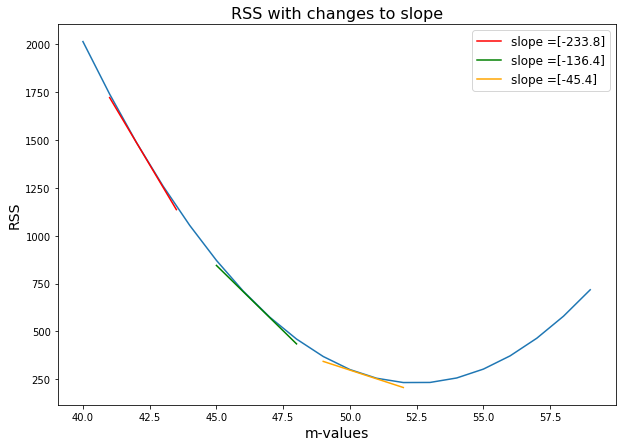

In [6]:
plt.figure(figsize=(10,7))
plt.plot(table[:,0], table[:,1], '-')
plt.plot(x_dev_1, y_dev_1, color = "red",  label = "slope =" + str(fprime_1))
plt.plot(x_dev_2, y_dev_2, color = "green",  label = "slope =" + str(fprime_2))
plt.plot(x_dev_3, y_dev_3, color = "orange", label = "slope =" + str(fprime_3))

plt.xlabel("m-values", fontsize=14)
plt.ylabel("RSS", fontsize=14)
plt.legend(loc='upper right', fontsize='large')

plt.title("RSS with changes to slope", fontsize=16);

### Stepping according to the slope

When you look at the above plot in detail you can see that we added numbers to our slope.  The slope of the curve at any given point is equal to the slope of the tangent line at that point.  By tangent line, we mean the line that just barely touches the curve at that point.  In the above graph, the red, green and orange lines are tangent to our cost curve at the points where $m$ equals 42.25, 46.5, and 50.5, respectively.  The slopes of our tangent lines, and therefore the slopes of the cost curves at those points, are labeled above.  

Let's see how this works.

We use the following procedure to find the ideal $m$: 
1.  Randomly choose a value of $m$, and 
2.  Update $m$ with the formula $ m = (-.02) * slope_{m = i} + m_i$.

The formula above tells us which $m$ value to look at next. We start by choosing a random $m$ value that we can plug into our formula. We take the slope of the curve at that $m$ value and multiply it by $-.02$ then add it to our original $m$ value to produce our next $m$ value.

As we can surmise, the larger the slope, the larger the resulting step to the next $m$ value.

Here's an example.  We randomly choose a $m$ value of 42.  Then:

* $m_{t=0} = 42 $
* $m_{t=1} = (-.02) * -239  + 42 = 4.78 + 42 = 46.78 $
* $m_{t=2} = (-.02) * -129.4 + 46.8 = 2.588 + 46.8 = 49.388 $

* $m_{t=3} = (-.02) * -60.4 + 49.4 = 1.208 + 49.4 = 50.61  $

> Notice that we don't update our values of $m$ by just adding or subtracting the slope at that point.  The reason we multiply the slope by a fraction like .02 is so that we avoid the risk of overshooting the minimum.  This fraction is called the **learning rate**.  Here, the fraction is negative because we always want to move in the opposite direction of the slope. When the slope of the cost curve points downwards, we want to move to a higher $m$ slope for our linear regression problem. Conversely, when we are on the right side of the curve and the slope is rising, we want to move backwards to a lower y-intercept.

This technique is pretty magical.  By looking at the tangent line at each point, we no longer are  changing our $m$ value and just hoping that it has the correct impact on our RSS.  This is because, for one, the slope of the tangent line points us in the right direction.  And as you can see above, our technique properly adjusts the amount to change the $m$ value without even knowing the ideal $m$ value.  When our $m$ was far away from the ideal $m$ value, our formula increased $m$ by almost 5. By the third step, we were updating our $m$ value by only 1.2 because we were closer to the ideal slope for minimizing the RSS.  

## Summary

We started this section by saying that we wanted a technique to find a $m$ value that would minimize our RSS, given a value of $b$.  We did not want to simply try all of the values of $m$ as doing so would be inefficient.  Instead, we went with the approach of gradient descent, where we try variations of regression lines iteratively changing our $m$ variable and assessing our RSS to see if we are making progress.

In this lesson, we focused in on how to know which direction to alter a given variable, $m$ or $b$, as well as a technique for determining the size of the change to apply to one of our variables.  We used the line tangent to our cost curve at a given point to indicate the direction and size of the update to $m$.  The further away, the steeper the curve and thus the larger the step we would want to take.  Appropriately, our tangent line slope would have us take a larger step.  And the closer we are to the ideal $b$ value, the flatter the tangent line to the curve, and the smaller a step we would take. 

# Gradient Descent: Step Sizes - Lab

## Introduction

In this lab, you'll practice applying gradient descent.  As you know, gradient descent begins with an initial regression line and moves to a "best fit" regression line by changing values of $m$ and $b$ and evaluating the RSS.  So far, we have illustrated this technique by changing the values of $m$ and evaluating the RSS.  In this lab, you will work through applying this technique by changing the value of $b$ instead.  Let's get started.

## Objectives

You will be able to:

- Use gradient descent to find the optimal parameters for a linear regression model
- Describe how to use an RSS curve to find the optimal parameters for a linear regression model

## Setting up our initial regression line

Once again, we'll take a look at revenues our data example, which looks like this:

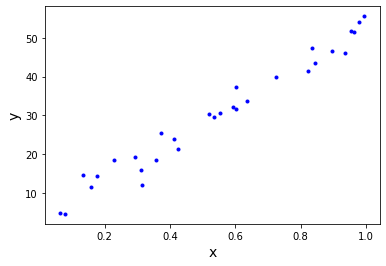

In [13]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
import matplotlib.pyplot as plt
np.random.seed(225)

x = np.random.rand(30, 1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.plot(x, y, '.b')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

We can start with some values for an initial not-so-accurate regression line, $y = 43x + 12$.

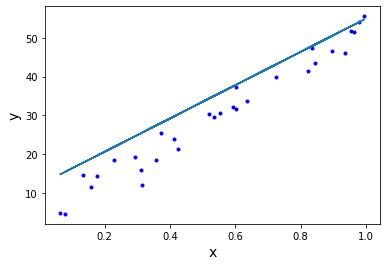

In [14]:
def regression_formula(x):
    return 12 + 43*x

np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return errors(x_values, y_values, m, b)**2

def residual_sum_squares(x_values, y_values, m, b):
    return sum(squared_errors(x_values, y_values, m, b))

Now using the `residual_sum_squares`, function, we calculate the RSS to measure the accuracy of the regression line to our data.  Let's take another look at that function:

In [15]:
residual_sum_squares(x, y , 43, 12) 

1117.8454014417434

### Building a cost curve

Now let's use the `residual_sum_squares` function to build a cost curve.  Keeping the $m$ value fixed at $43$, write a function called `rss_values`.  
* `rss_values` passes our dataset with the `x_values` and `y_values` arguments.  
* It also takes a list of values of $b$, and an initial $m$ value as arguments.  
* It outputs a numpy array with a first column of `b_values` and `rss_values`, with each key pointing to a list of the corresponding values.

In [18]:
def rss_values(x_values, y_values, m, b_values):
    b_min = min(b_values)
    b_max = max(b_values)
    table = np.zeros((((b_max-b_min)*2)+1,2))
    for idx, val in enumerate(np.linspace(b_min, b_max, ((b_max-b_min)*2)+1)):
        table[idx,0] = val
        table[idx,1] = residual_sum_squares(x_values, y_values, 43, val)
    return table

Now loop over a list with $b$ values between 0 and 14 with steps of 0.5. Store it in bval_RSS. Print out the resulting table.

In [19]:
import sys
b_val = list(range(0, 15, 1))
bval_RSS = rss_values(x,y,43,b_val)
np.savetxt(sys.stdout, bval_RSS, '%16.2f')  #this line is to round your result, which will make things look nicer.

            0.00          1750.97
            0.50          1552.09
            1.00          1368.21
            1.50          1199.33
            2.00          1045.45
            2.50           906.57
            3.00           782.69
            3.50           673.81
            4.00           579.93
            4.50           501.05
            5.00           437.17
            5.50           388.29
            6.00           354.41
            6.50           335.53
            7.00           331.65
            7.50           342.77
            8.00           368.89
            8.50           410.01
            9.00           466.13
            9.50           537.25
           10.00           623.37
           10.50           724.49
           11.00           840.61
           11.50           971.73
           12.00          1117.85
           12.50          1278.97
           13.00          1455.08
           13.50          1646.20
           14.00          1852.32


Plotly provides for us a table chart, and we can pass the values generated from our `rss_values` function to create a table.

And let's plot this out using a a line chart.

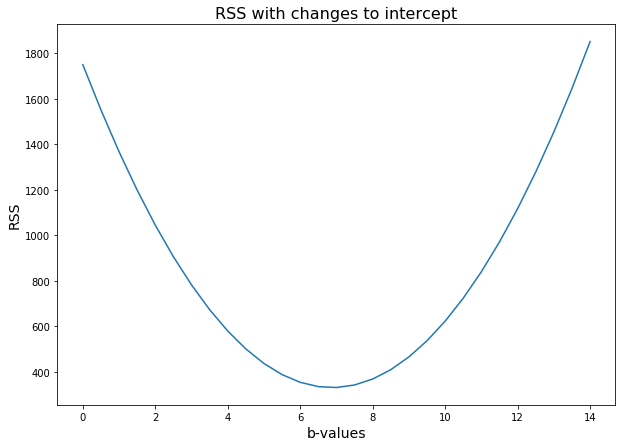

In [20]:
plt.figure(figsize=(10,7))
plt.plot(bval_RSS[:,0], bval_RSS[:,1], '-')
plt.xlabel("b-values", fontsize=14)
plt.ylabel("RSS", fontsize=14)
plt.title("RSS with changes to intercept", fontsize=16);

## Looking at the slope of our cost curve

In this section, we'll work up to building a gradient descent function that automatically changes our step size.  To get you started, we'll provide a function called `slope_at` that calculates the slope of the cost curve at a given point on the cost curve. Use the `slope_at` function for b-values 3 and 6.

In [21]:
def slope_at(x_values, y_values, m, b):
    delta = .001
    base_rss = residual_sum_squares(x_values, y_values, m, b)
    delta_rss = residual_sum_squares(x_values, y_values, m, b + delta)
    numerator = delta_rss - base_rss
    slope = numerator/delta
    return {'b': b, 'slope': slope}

slope_at(x, y, 43, 3)

{'b': 3, 'slope': -232.73066022784406}

In [ ]:
# Use slope_at

#{'b': 3, 'slope': -232.73066022784406}

In [22]:
# Use slope_at
slope_at(x, y, 43, 6)

{'b': 6, 'slope': -52.73066022772355}

{'b': 6, 'slope': -52.73066022772355}

So the `slope_at` function takes in our dataset, and returns the slope of the cost curve at that point.  So the numbers -232.73 and -52.73 reflect the slopes at the cost curve when b is 3 and 6 respectively.

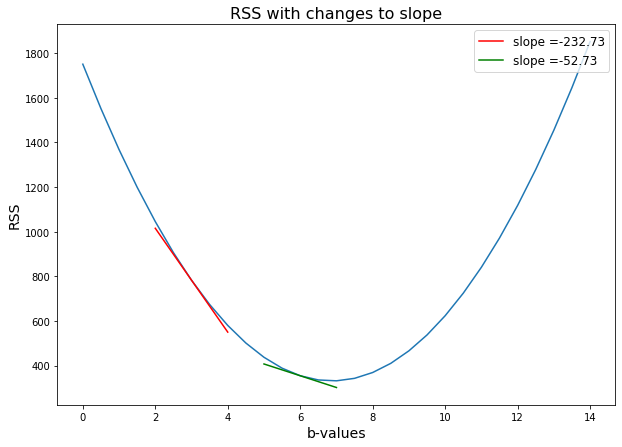

In [23]:
slope_3= slope_at(x, y, 43, 3)['slope']
slope_6 = slope_at(x, y, 43, 6)['slope']

x_3 = np.linspace(3-1, 3+1, 100)
x_6 = np.linspace(6-1, 6+1, 100)

rss_3 = residual_sum_squares(x, y, 43, 3)
rss_6 = residual_sum_squares(x, y, 43, 6)

tan_3 = rss_3+slope_3*(x_3-3)
tan_6 = rss_6+slope_6*(x_6-6)

plt.figure(figsize=(10,7))
plt.plot(bval_RSS[:,0], bval_RSS[:,1], '-')
plt.plot(x_3, tan_3, color = "red",  label = "slope =" + str(round(slope_3,2)))
plt.plot(x_6, tan_6, color = "green",  label = "slope =" + str(round(slope_6,2)))

plt.xlabel("b-values", fontsize=14)
plt.ylabel("RSS", fontsize=14)
plt.legend(loc='upper right', fontsize='large')

plt.title("RSS with changes to slope", fontsize=16);

As you can see, it seems pretty accurate.  When the curve is steeper and downwards at $b = 3$, the slope is around -232.73.  And at $b = 6$ with our cost curve becoming flatter, our slope is around -52.73. 

## Moving towards gradient descent

Now that we are familiar with our `slope_at` function and how it calculates the slope of our cost curve at a given point, we can begin to use that function with our gradient descent procedure.

Remember that gradient descent works by starting at a regression line with values m, and b, which corresponds to a point on our cost curve.  Then we alter our m or b value (here, the b value) by looking to the slope of the cost curve at that point.  Then we look to the slope of the cost curve at the new b value to indicate the size and direction of the next step.

So now let's write a function called `updated_b`.  The function will tell us the step size and direction to move along our cost curve.  The `updated_b` function takes as arguments an initial value of $b$, a learning rate, and the `slope` of the cost curve at that value of $m$.  Its return value is the next value of `b` that it calculates.

In [24]:
def updated_b(b, learning_rate, cost_curve_slope):
    change_to_b = -1 * learning_rate * cost_curve_slope
    return change_to_b + b

This is what our function returns.

In [25]:
current_slope = slope_at(x, y, 43, 3)['slope']
updated_b(3, .01, current_slope)
# 5.327

5.3273066022784406

In [26]:
current_slope = slope_at(x, y, 43, 5.327)['slope']
updated_b(5.327, .01, current_slope)
# 6.258

6.2581066022854674

In [27]:
current_slope = slope_at(x, y, 43, 6.258)['slope']
updated_b(6.258, .01, current_slope)
# 6.6305

6.630506602279827

In [28]:
current_slope = slope_at(x, y, 43, 6.631)['slope']
updated_b(6.631, .01, current_slope)
# 6.780

6.779706602280413

Take a careful look at how we use the `updated_b` function.  By using our updated value of $b$ we are quickly converging towards an optimal value of $b$.   

Now let's write another function called `gradient_descent`.  The inputs of the function are `x_values`, `y_values`, `steps`, the `m` we are holding constant, the `learning_rate`, and the `current_b` that we are looking at.  The `steps` arguments represent the number of steps the function will take before the function stops.  We can get a sense of the return value in the cell below.  It is a list of dictionaries, with each dictionary having a key of the current `b` value, the `slope` of the cost curve at that `b` value, and the `rss` at that `b` value.

In [29]:
def gradient_descent(x_values, y_values, steps, current_b, learning_rate, m):
    cost_curve = []
    for i in range(steps):
        current_cost_slope = slope_at(x_values, y_values, m, current_b)['slope']
        current_rss = residual_sum_squares(x_values, y_values, m, current_b)
        cost_curve.append({'b': current_b, 'rss': round(current_rss,2), 'slope': round(current_cost_slope,2)})
        current_b = updated_b(current_b, learning_rate, current_cost_slope)
    return cost_curve

descent_steps = gradient_descent(x, y, 15, 0, learning_rate = .005, m = 43)
descent_steps

#[{'b': 0, 'rss': 1750.97, 'slope': -412.73},
# {'b': 2.063653301142949, 'rss': 1026.94, 'slope': -288.91},
# {'b': 3.5082106119386935, 'rss': 672.15, 'slope': -202.24},
# {'b': 4.519400729495828, 'rss': 498.29, 'slope': -141.57},
# {'b': 5.2272338117862205, 'rss': 413.1, 'slope': -99.1},
# {'b': 5.72271696938941, 'rss': 371.35, 'slope': -69.37},
# {'b': 6.06955517971187, 'rss': 350.88, 'slope': -48.56},
# {'b': 6.312341926937677, 'rss': 340.86, 'slope': -33.99},
# {'b': 6.482292649996282, 'rss': 335.94, 'slope': -23.79},
# {'b': 6.601258156136964, 'rss': 333.53, 'slope': -16.66},
# {'b': 6.684534010435641, 'rss': 332.35, 'slope': -11.66},
# {'b': 6.742827108444089, 'rss': 331.77, 'slope': -8.16},
# {'b': 6.7836322770506285, 'rss': 331.49, 'slope': -5.71},
# {'b': 6.812195895074922, 'rss': 331.35, 'slope': -4.0},
# {'b': 6.832190427692808, 'rss': 331.28, 'slope': -2.8}]

[{'b': 0, 'rss': 1750.97, 'slope': -412.73},
 {'b': 2.063653301142949, 'rss': 1026.94, 'slope': -288.91},
 {'b': 3.5082106119386935, 'rss': 672.15, 'slope': -202.24},
 {'b': 4.519400729495828, 'rss': 498.29, 'slope': -141.57},
 {'b': 5.2272338117862205, 'rss': 413.1, 'slope': -99.1},
 {'b': 5.72271696938941, 'rss': 371.35, 'slope': -69.37},
 {'b': 6.06955517971187, 'rss': 350.88, 'slope': -48.56},
 {'b': 6.312341926937677, 'rss': 340.86, 'slope': -33.99},
 {'b': 6.482292649996282, 'rss': 335.94, 'slope': -23.79},
 {'b': 6.601258156136964, 'rss': 333.53, 'slope': -16.66},
 {'b': 6.684534010435641, 'rss': 332.35, 'slope': -11.66},
 {'b': 6.742827108444089, 'rss': 331.77, 'slope': -8.16},
 {'b': 6.7836322770506285, 'rss': 331.49, 'slope': -5.71},
 {'b': 6.812195895074922, 'rss': 331.35, 'slope': -4.0},
 {'b': 6.832190427692808, 'rss': 331.28, 'slope': -2.8}]

Looking at our b-values, you get a pretty good idea of how our gradient descent function works.  It starts far away with $b = 0$, and the step size is relatively large, as is the slope of the cost curve.  As the $b$ value updates such that it approaches a minimum of the RSS, the slope of the cost curve and the size of each step both decrease.     

Remember that each of these steps indicates a change in our regression line's slope value towards a "fit" that more accurately matches our dataset.  Let's plot the final regression line as found before, with $m=43$ and $b=6.83$

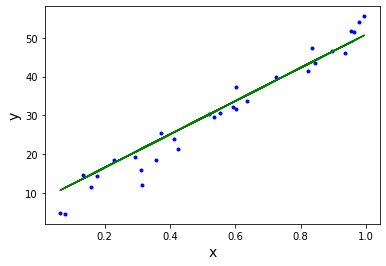

In [33]:
# plot the final result here
np.random.seed(225)
x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50 * x + y_randterm

plt.plot(x, y, '.b')
plt.plot(x, (43*x + 6.83), '-', color="green")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

As you can see, this final intercept value of around $b=6.8$ better matches our data. Remember that the slope was kept constant. You can see that lifting the slope upwards could probably even lead to a better fit!

## Summary

In this lesson, we learned some more about gradient descent.  We saw how gradient descent allows our function to improve to a regression line that better matches our data.  We see how to change our regression line, by looking at the Residual Sum of Squares related to the current regression line. We update our regression line by looking at the rate of change of our RSS as we adjust our regression line in the right direction -- that is, the slope of our cost curve.  The larger the magnitude of our rate of change (or slope of our cost curve) the larger our step size.  This way, we take larger steps the further away we are from our minimizing our RSS, and take smaller steps as we converge towards our minimum RSS. 

# Gradient Descent in 3D
## Introduction
Previously, we talked about how to think about gradient descent when moving along a 3D cost curve.

<img src="./images/new_gradientdescent.png" width="600">

We know that moving along the 3D cost curve above means changing the $m$ and $b$ variables of a regression line like the one below.  And we do so with the purpose of having our line better match our data. In this section, you'll learn about *partial derivatives* which will make you achieve this. 

## Objectives
You will be able to:
* Define a partial derivative
* Interpret visual representations of gradient descent in more than two dimensions

## Review gradient descent in two dimensions
In this lesson, we'll learn about gradient descent in three dimensions, but let's first remember how it worked in two dimensions when we changed just one variable of our regression line.  
​
In two dimensions, when changing just one variable, $m$ or $b$, gradient descent means stepping forwards or backwards along the cost curve and taking a specific step size.  To determine whether to move forwards or backwards as well as the step size, we imagine standing on this two-dimension curve (shown below) and feeling the slope of our cost curve to tell us how to move.  A step in a direction means a change in one of our regression variables.

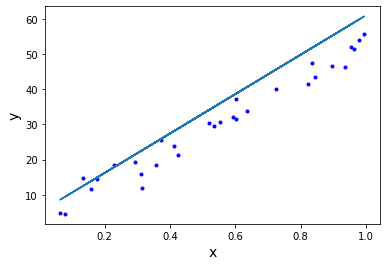

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(225)

def regression_formula(x):
    return 5 + 56*x

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

As we adjust to different slopes, we achieve different errors, represented by RSS.

![](./images/slopes.png)

So that is how gradient descent is represented in two dimensions. How is gradient descent represented in three dimensions?

## Gradient Descent in 3 dimensions
In three dimensions, we once again choose an initial regression line, which means that we are choosing a point on the graph below.  Then we begin taking steps towards the minimum.  But of course, we are now able to walk not just forwards and backwards but left and right as well -- as we now can alter two variables.  

<img src="./images/new_gradientdescent.png" width="600">

To get a sense of how this works, imagine our initial regression line places us at the back-left corner of the graph above, with a slope of 50, and y-intercept of negative 20.  Now imagine that we cannot see the rest of the graph - yet we still want to approach the minimum.  How do we do this?

Once again, we feel out the slope of the graph with our feet.  Only this time, as we shift our feet, we are preparing to walk in two-dimensional space.  

![](./images/traveller-stepping.jpg)

So this is our approach.  We shift horizontally a little bit to determine the change in output in the right-left direction, and then we shift forward and back to determine the change in output in that direction.  From there we take the next step in the direction of the steepest descent. 

So this is why our technique of gradient descent is so powerful.  Once we consider that in moving towards our best fit lines, we have a choice of moving anywhere in a two-dimensional space, then using the slope to guide us only becomes more important.    
So how does this approach of shifting back and forth translate mathematically?  It means we determine the slope in one dimension, then the other. Then, we move where that slope is steepest downwards.  This moves us towards our minimum.  

## Partial Derivatives
To measure the slope in each dimension, one after the other, we'll take the derivative with respect to one variable, and then take the derivative with respect to another variable.  Now let's be very explicit about what it means to take the partial derivative with respect to a variable.

Let's again talk about this procedure in general, and then we'll apply it to the cost curve.  So let's revisit our multivariable function: 

$$f(x, y) = y*x^2 $$

Remember that the function looks like the following: 

<img src="./images/new_parabolayx2.png" width="400">

To take a derivative with respect to $x$ means to ask, how does the output change, as we make a nudge only in the $x$ direction. To express that we are nudging in the $x$ direction we say $\frac{\delta f}{\delta x}$.  That symbol is the lower case delta.  We read this as taking the derivative with respect to $x$.  But it just means seeing the change in output as we nudge in the $x$ direction.  

And to express the change in output with respect to $y$, we say $\frac{\delta f}{\delta y}$.  And this just means calculating the change in output as we nudge our input over in the $y$ direction.

## Visualizing the partial derivative
So what does a derivative $\frac{\delta f}{\delta x}$ look like? How do we think of a partial derivative of a multivariable function?

Well, remember how we think of a standard derivative of a one variable function, for example $f(x) = x^2 $. 

![](./images/tangent-liner.png)

So in two dimensions, to take the derivative at a given point, we simply calculate the slope of the function at that x value.
Now the partial derivative of a multivariable function is fairly similar.  But here it's equal to the slope of the tangent line at a specific $x$ value **and** a specific $y$ value.  Let's break this down by using our patented "freeze-frame" method.  The graphs below show lines tangent to the curve in the $x$ direction.  (The tangent lines are a little small, but they and their corresponding slopes are there). 

### Graphs for $\frac{df}{dx}$

<img src="images/dfdx.png" width="800">

Let's take a close look.  The top-left graph shows $\frac{\delta f}{\delta x}$ at different points of $f(x, y)$ where $y = -1$.  So as you can see, $\frac{\delta f}{\delta x}f(3, -1) = -6$ as shown in the cyan line in the top left.  That's because when you move to that point on the graph, $(3, -1)$ and then nudge a little bit in the $x$ direction, the change in output is $-6$.  And that is represented by the line tangent to the function at that point in the $x$ direction.  You can go through the other points in these graphs, and work through the same logic. 

So with taking the partial derivative $\frac{\delta f}{\delta x}$, you may think about moving to the slice of the graph for a given value of $y$, then moving to the proper value of $x$, and then finding the tangent line at that point.  

As you can see, $\frac{\delta f}{dx}$ means the change in output from a nudge in $x$ direction, but the derivative is still influenced by $y$ component of the function.  You can see this because, for different values of $y$, our slice of the graph looks different, and thus tangent lines for those slices look different.

## One more example
This can be a little mind-bending so let's go through this again for $\frac{df}{dy}f(x, y)$ where $f(x,y) = (yx^2) $.  Once again, the 3-d graph of $f(x,y) = yx^2$ is the following: 
​
<img src="./images/new_parabolayx2.png" width="400">
Now for $\frac{df}{dy}$ of a function $f(x, y) $ you can think sliding through different slices of the function but this time for different values of $x$.  So again, we have our freeze-frame, but this time each frame represents ascending values along the x-axis.  
​
First, let's understand our plots below -- they may be surprising.  Starting at the top left quadrant the graph of the function $f(x,y)$ makes sense as when $x =-1$ then the function is just $f(y) = -1*y $.  And moving down to the bottom left, $f(2, y) = 2^2*y = 4y$.  
​
So now, to think about taking the derivative, once again we move to a slice of graph for a value of $x$, and then move in the $y$ direction.  So $\frac{df}{dy}$ at $\frac{df}{dy}f(1, y)$ = 1.  And we know that the derivative of a line is always just equal to the line's slope.  For $f(1, y)$ that slope, and thus the derivative, is always $1$.  For $f(2, y)$ it's 4.
### Graphs for $\frac{df}{dy}$
<img src="images/dfdy.png" width="800">
So that is our technique for a partial derivative.  For $\frac{df}{dy} $ we move to a slice of the curve at a specific value of $x$, move to the point for y, and then calculate the change in output as we nudge in the $y$ direction.  
​
For $\frac{df}{dx}$ (again below), we move to a slice of a curve of a specific value of $y$, move the correct value of $x$ and then calculate how much the output changes as we nudge in the $y$ direction.  Just think slide, slide then nudge.  That's a partial derivative.

### Graphs for $\frac{df}{dx}$
<img src="images/dfdx.png" width="800">

## Our rule for partial derivatives
Ok, so now that you understand the slide, slide, nudge, maybe you can understand this little shortcut that we can pull.  For any multivariable function, the variables that you are **not** taking the derivative with respect to can just be treated as a constant.
For example, with our function of $f(x, y) = y*x^2 $, when taking the partial derivative $\frac{df}{dy}f(x, y)$, we treat all values of $x$ as a constant.  Let's do it:
​
​
$$\frac{df}{dy}f(x,y) =  \frac{df}{dy}(y) * x^2 = 1*x^2 = x^2$$
So that's all it means to take a partial derivative of something: look at what you are taking a derivative with respect to, and only take the derivative of those types of variables.  And guess what, this result lines up to what we saw earlier.
<img src="images/dfdy.png" width="800">
We calculated that $\frac{df}{dy}f(x,y) = x^2 $, and that is what the graphs show.  When $x = 2$ our derivative is always 4.  And when $x$ is $3$ the derivative is always 9.  So even though we are taking $\frac{df}{dy}$, the $x$ value is influencing the steepness of that line.  But by the time we get to our nudge, that value of $x$ is **constant**, it's influenced has already been applied, and then we are seeing how the output changes as we nudge in the $y$ direction.
Now let's try our rule one more time, this time $\frac{df}{dx}f(x, y)$ for our function $f(x, y) = y*x^2 $.
​
​
​
$$\frac{df}{dx}f(x,y) = y*\frac{df}{dx}(x^2) = 2*y*x$$
So this time with $\frac{df}{dx}f(x,y) $, we treat $y$ as a constant, as the influence $y$ is first applied by moving to a slice of our graph for a value of $y$.  Then once there, we are evaluating the change in output as we nudge in the $x$ direction.   

<img src="images/dfdx.png" width="800">

## Summary
In this section, we have learned how to think about taking the partial derivative of a function.  For the partial derivative, we say we are taking the derivative with respect to a variable.  So for example, we can say for the function $f(x, y)$, take the partial derivative with respect to the variable $x$.  This means we are assessing the output after nudging in the $x$ direction, and we can express this as $\frac{\delta f}{\delta x} $.  Our rule for taking the partial derivative is to treat the variables that we are not taking the derivative with respect to as constants.  Which makes sense, because at the time that we are taking the derivative by making our "nudge" the only variable that is changing is the variable we are taking the derivative with respect to.

# The Gradient in Gradient Descent
## Introduction
​
As you know, we entered our discussion of derivatives to determine the size and direction of a step with which to move along a cost curve.  We first used a derivative in a single variable function to see how the output of our cost curve changed with respect to change a change in one of our regression line's variables.  Then we learned about partial derivatives to see how a *three-dimensional cost curve* responded to a change in the regression line.  
​
However, we have not yet explicitly showed how partial derivatives apply to gradient descent.
​
Well, that's what we hope to show in this lesson: explain how we can use partial derivatives to find the path to minimize our cost function, and thus find our "best fit" regression line.

## Objectives
​
You will be able to:
- Define a gradient in relation to gradient descent

## What is the gradient?
Now gradient descent literally means that we are taking the shortest path to *descend* towards our minimum.  However, it is somewhat easier to understand gradient *ascent* than descent, and the two are quite related, so that's where we'll begin.  Gradient ascent, as you could guess, simply means that we want to move in the direction of steepest ascent.
​
Now moving in the direction of greatest ascent for a function $f(x,y)$, means that our next step is a step some distance in the $x$ direction and some distance in the $y$ direction which is the steepest upward at that point.
Note how this is a different task from what we have previously worked on for multivariable functions.   So far, we have used partial derivatives to calculate the **gain** from moving directly in either the $x$ direction or the $y$ direction.  

> Here, in finding gradient ascent, our task is not to calculate the gain from a move in either the $x$ or $y$ direction.  Instead, our task is to **find some combination of a change in $x$,$y$ that brings the largest change in output**.  

So if you look at the path our climbers are taking in the picture above, *that* is the direction of gradient ascent.  If they tilt their path to the right or left, they will no longer be moving along the steepest upward path.

The direction of the greatest rate of increase of a function is called the gradient.  We denote the gradient with the nabla, which comes from the Greek word for harp, which is kind of what it looks like: $\nabla $.  So we can denote the gradient of a function, $f(x, y)$, with $\nabla f(x, y) $.

## Calculating the gradient
Now how do we find the direction for the greatest rate of increase?  We use partial derivatives.  Here's why.
​
As we know, the partial derivative $\frac{df}{dx}$ calculates the change in output from moving a little bit in the $x$ direction, and the partial derivative $\frac{df}{dy}$ calculates the change in output from moving in the $y$ direction.  Because with gradient ascent our goal is to make a nudge in $x, y$ that produces the greatest change in output, if $\frac{df}{dy} > \frac{df}{dx}$, we should make that move more in the $y$ direction than the $x$ direction, and vice versa.  That is, we want to get the biggest bang for our buck.  

![](./images/Denali.jpg)

Let's relate this again to mountain climbers. Imagine the vertical edge on the left is our y-axis and the horizontal edge is on the bottom is our x-axis.  For the climber in the yellow jacket, imagine his step size is three feet. A step straight along the y-axis will move him further upwards than a step along the x-axis.  So in taking that step, he should direct himself more towards the y-axis than the x-axis.  That will produce a bigger increase per step size.

In fact, the direction of greatest ascent for a function,  $\nabla f(x, y)$, is the direction which is a proportion of $\frac{df}{dy}$ steps in the $y$ direction and $\frac{df}{dx}$ in the $x$ direction.  So, for example, if $\frac{df}{dy}$ = 5 and $\frac{df}{dx}$ = 1, the direction of gradient ascent is five times more in the $y$ direction than the $x$ direction.  And this seems to be the path, more or less that our climbers are taking - some combination of $x$ and $y$, but tilted more towards the $y$ direction.

## Applying Gradient Descent 
Now that we have a better understanding of a gradient, let's apply our understanding to a multivariable function.  Here is a plot of a function:
​
$$f(x,y) = 2x + 3y $$
​
<img src="./images/new_gradDescinDesc.png" width="400">

Imagine being at the bottom left of the graph at the point $x = 1$, $y = 1$.  What would be the direction of steepest ascent?  It seems, just sizing it up visually, that we should move both in the positive $y$ direction and the positive $x$ direction.  Looking more carefully, it seems we should move **more** in the $y$ direction than the $x$ direction.  Let's see what our technique of taking the partial derivative indicates.   
The gradient of the function $f(x,y)$, that is $ \nabla f(x,y) = 2x + 3y $ is the following: 

$\frac{df}{dx}(2x + 3y) = 2 $ and $\frac{df}{dy}(2x + 3y) = 3 $.

So what this tells us is to move in the direction of greatest ascent for the function $f(x,y) = 2x + 3y $, is to move up three and to the right two.  So we would expect our path of greatest ascent to look like the following.

![](./images/gradient-plot.png)
<img src="./images/new_gradDescinDesc.png" width="400">

So this path maps up well to what we see visually.  That is the idea behind gradient descent.  The gradient is the partial derivative with respect to each type of variable of a multivariable function, in this case $x$ and $y$.  And the importance of the gradient is that its direction is the direction of steepest ascent.  The negative gradient, that is the negative of each of the partial derivatives, is the direction of steepest descent.  So our direction of gradient descent for the graph above is $x = -2$, $y = -3$.  And looking at the two graphs above, it seems that the steepest downward direction is just the opposite of the steepest upward direction.  We get that by mathematically by simply taking the multiplying our partial derivatives by negative one.

## Summary
In this lesson, you saw how to use gradient descent to find the direction of steepest descent.  You saw that the direction of steepest descent is generally some combination of a change in your variables to produce the greatest negative rate of change.  

You first how saw how to calculate the gradient **ascent**, or the gradient $\nabla $, by calculating the partial derivative of a function with respect to the variables of the function.  So $\nabla f(x, y) = \frac{\delta f}{\delta y}, \frac{\delta f}{\delta x} $.  This means that to take the path of greatest ascent, you should move $ \frac{\delta f}{\delta y} $ divided by $ \frac{\delta f}{\delta x} $.  So for example, when $ \frac{\delta f}{\delta y}f(x, y)  = 3 $ , and $ \frac{\delta f}{\delta x}f(x, y)  = 2$, you traveled in line with a slope of 3/2.

For gradient descent, that is to find the direction of greatest decrease, you simply reverse the direction of your partial derivatives and move in $ - \frac{\delta f}{\delta y}, - \frac{\delta f}{\delta x}$. 

# Gradient to Cost Function
## Introduction
In the previous lesson, we learned the mathematical definition of a gradient.  We saw that the gradient of a function was a combination of our partial derivatives with respect to each variable of that function.  We saw the direction of gradient descent was simply to move in the negative direction of the gradient.  For example, if the direction of ascent of a function is a move up and to the right, the descent is down and to the left. In this lesson, we will apply gradient descent to our cost function to see how we can move towards a best fit regression line by changing variables of $m$ and $b$.  

## Objectives
You will be able to:
- Represent RSS as a multivariable function and take partial derivatives to perform gradient descent

## Representing RSS as a multivariable function
Think about why gradient descent applies so well to a cost function.  Initially, we said that the cost of our function, meaning the difference between what our regression line predicted and the dataset, changed as we altered the y-intercept or the slope of the function.

Remember that mathematically, when we say cost function, we use the residual sum of squares where 
$$ 
\begin{align}
RSS &= \sum_{i=1}^n(actual - expected)^2 \\
&= \sum_{i=1}^n(y_i - \hat{y})^2 \\
&= \sum_{i=1}^n(y_i - (mx_i + b))^2
\end{align}
$$ 
for all $x$ and $y$ values of our dataset.  So in the graph directly below, $x_i$ and $y_i$  would be our points representing a movie's budget and revenue.  Meanwhile, $mx_i + b $ is our predicted $y$ value for a given $x$ value, of a budget. 

And RSS takes the difference between $mx_i + b$, the $y_i$ value our regression line (the red line below) predicts, and our actual $y$, and sum up these squares for each piece of data in our dataset.  That is the residual sum of squares.

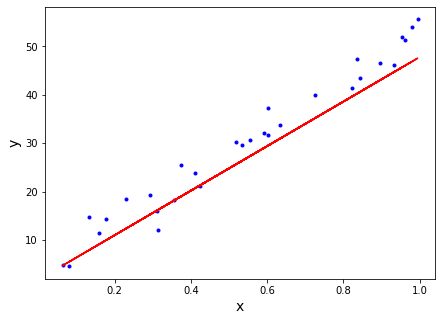

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def regression_formula(x):
    return 1.8 + 46*x

np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.figure(figsize=(7,5))
plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-', color="red")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

And we when we just plotted how RSS changes as we change one variable of our regression line, $m$ or $b$, we note how this looks like a curve, and call it our cost curve.

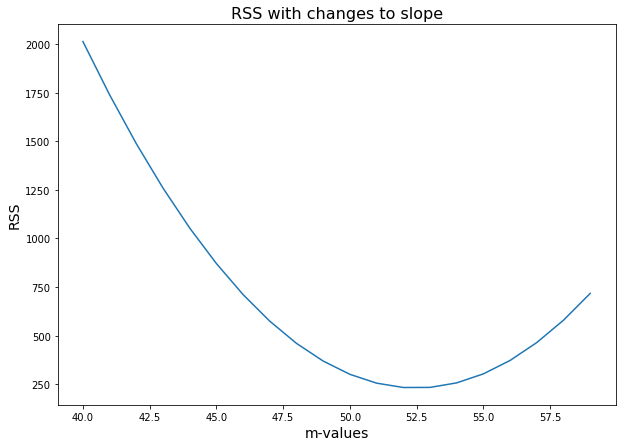

In [36]:
def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return np.round(errors(x_values, y_values, m, b)**2, 2)

def residual_sum_squares(x_values, y_values, m, b):
    return round(sum(squared_errors(x_values, y_values, m, b)), 2)

table = np.zeros((20,2))
for idx, val in enumerate(range(40, 60)):
    table[idx,0] = val
    table[idx,1] = residual_sum_squares(x, y, val, 1.319)
    
plt.figure(figsize=(10,7))
plt.plot(table[:,0], table[:,1], '-')
plt.xlabel("m-values", fontsize=14)
plt.ylabel("RSS", fontsize=14)
plt.title("RSS with changes to slope", fontsize=16);

In two dimensions, we decrease our RSS simply by moving forwards or backwards along the cost curve which is the equivalent of changing our variable, in this case y-intercept.  So the cost curve above indicates that changing the regression line from having a $m$ slope from 42 to 45 decreases our cost, the RSS.

Allowing us to change both variables, $m$ and $b$ means calculating how RSS varies with both $m$ and $b$. 

Because the RSS is a function of how we change our values of $m$ and $b$, we can express this relationship mathematically by saying the cost function, $J$ is the following:  
$$
\begin{align}
J(m, b) & = \sum_{i=1}^{n}(y_i - \hat{y})^2\\
J(m, b) & = \sum_{i=1}^{n}(y_i - (mx_i + b))^2 &&\text{notice $\hat{y} = mx + b$}\\
\end{align}
$$

In the function above, $J$ is a function of $m$ and $b$. $J$ just represents the residual sum of squares, which varies as the $m$ and $b$ variables of our regression line are changed.  

Just our other multivariable functions we have seen thus far, we can display it in three dimensions, and it looks like the following.

<img src="./images/new_gradientdescent.png" width="600">

The three-dimensional graph above shows how the cost associated with our regression line changes as the slope and y-intercept values are changed.  

## Calculating the gradient of our cost function
Let's explore using gradient descent to determine how to change our regression line when we can alter both $m$ and $b$ variables.  When applied to a general multivariable function $f(x,y)$, gradient descent answered how much move the $x$ variable and the $y$ variable to produce the greatest decrease in output.  

> Now that we are applying gradient descent to our cost curve $J(m, b)$, the technique should answer how much to move the $m$ variable and the $b$ variable to produce the greatest decrease in cost, or RSS. In other words, when altering our regression line, we want to know how much of this change should be derived from a move in the slope versus how much should be derived from a change in the y-intercept.

As we know, the gradient of a function is simply the partial derivatives with respect to each of the variables, so:

$$ \nabla J(m, b) = \frac{\delta J}{\delta m}, \frac{\delta J}{\delta b}$$

In calculating the partial derivatives of our function $J(m, b) = \sum_{i=1}^{n}(y_i - (mx_i + b))^2$, **we won't change the result if we ignore the summation until the very end**.  We'll do that to make our calculations easier.

Ok, so let's take our partial derivatives of the following:

$$
\begin{align}
\frac{\delta J}{\delta m}J(m, b) & = \boldsymbol{\frac{\delta J}{\delta m}}(y - (mx + b))^2  &&\text{partial derivative with respect to} \textbf{ m}\\
\\
\frac{\delta J}{\delta b}J(m, b) & = \boldsymbol{\frac{\delta J}{\delta b}}(y - (mx + b))^2  &&\text{partial derivative with respect to} \textbf{ b}\\
\end{align}
$$

You'll notice that taking the partial derivatives of these functions is not that simple. You've learned a set of rules about derivatives in this section, but if you want to take these two derivatives successfully, you'll need to use the **chain rule**. The chain rule is a formula to compute the derivative of a composite function.

The **chain rule** basically tells you how to compute the derivative of nearly _any function_ (or any "molecular" function built up from fundamental "atomic" functions like $sin(x)$ or $e^x$).

In this lesson, we don't want to get lost in the details of the chain rule and how to get to the the partial derivatives needed in this lesson, but in the appendix, you can find:
- a lesson on the chain rule in general
- A lesson that walks you through the details of finding the partial derivatives in this lesson.

The resulting partial derivatives are:

$$
\begin{align}
\frac{\delta J}{\delta m}J(m, b)&= -2x*(y - (mx + b ))
\end{align}
$$

$$
\begin{align}
\frac{\delta J}{\delta b}J(m, b) & = -2*(y - (mx + b))
\end{align}
$$

## Using both of our partial derivatives for gradient descent
Ok, so now we have our two partial derivatives for $\nabla J(m, b)$:

$$ \frac{dJ}{dm}J(m,b) = -2*x(y - (mx + b )) $$
$$ \frac{dJ}{db}J(m,b) = -2*(y - (mx + b)) $$

And as $mx + b$ = is just our regression line, we can simplify these formulas to be: 

$$ \frac{dJ}{dm}J(m,b) = -2*x(y - \hat{y})  = -2x*\epsilon$$
$$ \frac{dJ}{db}J(m,b) = -2*(y - \hat{y}) = -2\epsilon$$

Remember, `error` = `actual` - `expected`, so we can replace $y - \hat{y}$ with $\epsilon$, our error. As we mentioned above, our last step is adding back the summations.  Since $-2$ is a constant, we can keep this outside of the summation.  Our value for $x$ changes depending upon what x value we are at, so it must be included inside the summation for the first equation.  Below, we have: 

$$ \frac{dJ}{dm}J(m,b) = -2*\sum_{i=1}^n x(y_i - \hat{y}_i)  = -2*\sum_{i=1}^n x_i*\epsilon_i$$
$$ \frac{dJ}{db}J(m,b) = -2*\sum_{i=1}^n(y_i - \hat{y}_i) = -2*\sum_{i=1}^n \epsilon_i$$

So that is what what we'll do to find the "best fit regression line."  We'll start with an initial regression line with values of $m$ and $b$.  Then we'll go through our dataset, and we will use the above formulas with each point to tell us how to update our regression line such that it continues to minimize our cost function.

In the context of gradient descent, we use these partial derivatives to take a step size.  Remember that our step should be in the opposite direction of our partial derivatives as we are *descending* towards the minimum.  So to take a step towards gradient descent we use the general formula of:

`current_m` =  `old_m` $ - \frac{dJ}{dm}J(m,b)$

`current_b` =  `old_b` $ - \frac{dJ}{db}J(m,b) $

or in the code that we just calculated:

`current_m` = `old_m` $ -  (-2*\sum_{i=1}^n x_i*\epsilon_i )$

`current_b` =  `old_b` $ - ( -2*\sum_{i=1}^n \epsilon_i )$

In the next lesson, we'll work through translating this technique, with use of our $\nabla J(m, b)$, into code to descend along our cost curve and find the "best fit" regression line.

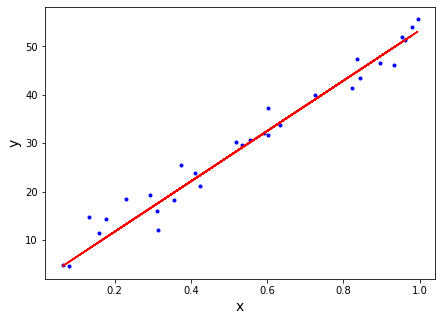

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def regression_formula(x):
    return 1.319 + 52*x

np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.figure(figsize=(7,5))
plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-', color="red")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

## Summary
In this section, we developed some intuition for why the gradient of a function is the direction of steepest ascent and the negative gradient of a function is the direction of steepest descent.  Essentially, the gradient uses the partial derivatives to see what change will result from changes in the function's dimensions, and then moves in that direction weighted more towards the partial derivative with the larger magnitude.

We also practiced calculating some gradients, and ultimately calculated the gradient for our cost function.  This gave us two formulas that tell us how to update our regression line so that it descends along our cost function and approaches a "best fit line".

# Applying Gradient Descent - Lab

## Introduction

In the last lesson, we derived the functions that we help us descend along our cost functions efficiently.  Remember that this technique is not so different from what we saw with using the derivative to tell us our next step size and direction in two dimensions.  

![](./images/slopes.png)

When descending along our cost curve in two dimensions, we used the slope of the tangent line at each point, to tell us how large of a step to take next.  And with the cost curve being a function of $m$ and $b$, we had to use the gradient to determine each step.  

<img src="./images/new_gradientdescent.png" width="600">

But really it's an analogous approach.  Just like we can calculate the use derivative of a function $f(x)$ to calculate the slope at a given value of $x$ on the graph and thus our next step.  Here, we calculated the partial derivative with respect to both variables, our slope and y-intercept, to calculate the amount to move next in either direction and thus to steer us towards our minimum.   

## Objectives

You will be able to:
* Create functions to perform a simulation of gradient descent for an actual dataset
* Represent RSS as a multivariable function and take partial derivatives to perform gradient descent

## Reviewing our gradient descent formulas

Luckily for us, we already did the hard work of deriving these formulas.  Now we get to see the fruit of our labor.  The following formulas tell us how to update regression variables of $m$ and $b$ to approach a "best fit" line.   

- $ \frac{dJ}{dm}J(m,b) = -2\sum_{i = 1}^n x_i(y_i - (mx_i + b)) = -2\sum_{i = 1}^n x_i*\epsilon_i$ 
- $ \frac{dJ}{db}J(m,b) = -2\sum_{i = 1}^n(y_i - (mx_i + b)) = -2\sum_{i = 1}^n \epsilon_i $

Now the formulas above tell us to take some dataset, with values of $x$ and $y$, and then given a regression formula with values $m$ and $b$, iterate through our dataset, and use the formulas to calculate an update to $m$ and $b$.  So ultimately, to descend along the cost function, we will use the calculations:

`current_m` = `old_m` $ -  (-2*\sum_{i=1}^n x_i*\epsilon_i )$

`current_b` =  `old_b` $ - ( -2*\sum_{i=1}^n \epsilon_i )$

Ok let's turn this into code.  First, let's initialize our data like we did before:

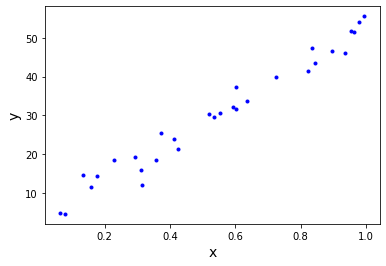

In [38]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(225)

x = np.random.rand(30, 1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3 + 50* x + y_randterm

data = np.array([y, x])
data = np.transpose(data)

plt.plot(x, y, '.b')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

- Now let's set our initial regression line by initializing $m$ and $b$ variables as zero.  Store them in `b_current` and `m_current`.
- Let's next initialize updates to these variables by setting the variables, `update_to_b` and `update_to_m` equal to 0.
- Define an `error_at` function which returns the error $\epsilon_i$ for a given $i$. The parameters are:
> point: a row of the particular data set  
> $b$: the intercept term  
> $m$: the slope  

- Then, use this `error_at` function to iterate through each of the points in the dataset, and at each iteration change our `update_to_b` by $2*\epsilon$ and change our `update_to_m` by $2*x*\epsilon$.

In [39]:
# initial variables of our regression line
b_current = 0
m_current = 0

#amount to update our variables for our next step
update_to_b = 0
update_to_m = 0 

# Define the error_at function
def error_at(point, b, m):
    return (point[0]- (m * point[1]  + b))

# iterate through data to change update_to_b and update_to_m
for i in range(0, len(data)):
    update_to_b += -2*(error_at(data[i], b_current, m_current))
    update_to_m += -2*(error_at(data[i], b_current, m_current))*data[i][1]

# Create new_b and new_m by subtracting the updates from the current estimates
new_b = b_current - update_to_b
new_m = m_current - update_to_m

In the last two lines of the code above, we calculate our `new_b` and `new_m` values by updating our taking our current values and adding our respective updates.  We define a function called `error_at`, which we can use in the error component of our partial derivatives above.

The code above represents **just one** update to our regression line, and therefore just one step towards our best fit line.  We'll just repeat the process to take multiple steps.  But first, we have to make a couple of other changes. 

## Tweaking our approach 

Ok, the above code is very close to what we want, but we just need to make tweaks to our code before it's perfect.

The first one is obvious if we think about what these formulas are really telling us to do.  Look at the graph below, and think about what it means to change each of our $m$ and $b$ variables by at least the sum of all of the errors, of the $y$ values that our regression line predicts and our actual data.  That would be an enormous change.  To ensure that we drastically updating our regression line with each step, we multiply each of these partial derivatives by a learning rate.  As we have seen before, the learning rate is just a small number, like $.
01$ which controls how large our updates to the regression line will be.  The learning rate is  represented by the Greek letter eta, $\eta$, or alpha $\alpha$.  We'll use eta, so $\eta = .01$ means the learning rate is $.01$.

Multiplying our step size by our learning rate works fine, so long as we multiply both of the partial derivatives by the same amount.  This is because without gradient,  $ \nabla J(m,b)$, we think of as steering us in the correct direction.  In other words, our derivatives ensure we are making the correct **proportional** changes to $m$ and $b$.  So scaling down these changes to make sure we don't update our regression line too quickly works fine, so long as we keep me moving in the correct direction.  While we're at it, we can also get rid of multiplying our partials by 2.  As mentioned, so long as our changes are proportional we're in good shape. 

For our second tweak, note that in general the larger the dataset, the larger the sum of our errors would be.  But that doesn't mean our formulas are less accurate, and there deserve larger changes.  It just means that the total error is larger.  But we should really think accuracy as being proportional to the size of our dataset.  We can correct for this effect by dividing the effect of our update by the size of our dataset, $n$.

Make these changes below:

In [40]:
#amount to update our variables for our next step
update_to_b = 0
update_to_m = 0 

# define learning rate and n
learning_rate = .01
n = len(data)

# create update_to_b and update_to_m
for i in range(0, n):
    update_to_b += -(1/n)*(error_at(data[i], b_current, m_current))
    update_to_m += -(1/n)*(error_at(data[i], b_current, m_current)*data[i][0])
    
# create new_b and new_m
new_b = b_current - (learning_rate * update_to_b)
new_m = m_current - (learning_rate * update_to_m)

So our code now reflects what we know about our gradient descent process.  Start with an initial regression line with values of $m$ and $b$.  Then for each point, calculate how the regression line fares against the actual point (that is, find the error).  Update what the next step to the respective variable should be by using the partial derivative.  And after iterating through all of the points, update the value of $b$ and $m$ appropriately, scaled down by a learning rate.

## Seeing our gradient descent formulas in action

As mentioned earlier, the code above represents just one update to our regression line, and therefore just one step towards our best fit line.  To take multiple steps we wrap the process we want to duplicate in a function called `step_gradient` and then can call that function as much as we want. With this function:

- Include a learning_rate of 0.1
- Return a tuple of (b,m)  
The parameters should be:
> b_current : the starting value of b   
> m_current : the starting value of m   
> points : the number of points at which we want to check our gradient 

See if you can use your `error_at` function within the `step_gradient` function!

In [41]:
def step_gradient(b_current, m_current, points):
    b_gradient = 0
    m_gradient = 0
    learning_rate = .1
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i][1]
        y = points[i][0]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y -  (m_current * x + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return (new_b, new_m)

Now let's initialize `b` and `m` as 0 and run a first iteration of the `step_gradient` function.

In [42]:
b = 0
m = 0
first_step = step_gradient(b, m, data) # {'b': 0.0085, 'm': 0.6249999999999999}

print(first_step[0])
print(first_step[1])
# b= 3.02503, m= 2.07286

3.0250308395837813
2.0728619246505193


So just looking at input and output, we begin by setting $b$ and $m$ to 0 and 0.  Then from our step_gradient function, we receive new values of $b$ and $m$ of 3.02503 and 2.0728.  Now what we need to do, is take another step in the correct direction by calling our step gradient function with our updated values of $b$ and $m$.

In [43]:
updated_b = first_step[0]
updated_m = first_step[1]
step_gradient(updated_b, updated_m, data) 
# b = 5.63489, m= 3.902265

(5.634896312558807, 3.902265648903966)

Let's do this, say, 1000 times.

In [44]:
# create a for loop to do this
# set our initial step with m and b values, and the corresponding error.
b = 0
m = 0
iterations = []
for i in range(1000):
    iteration = step_gradient(b, m, data)
    b = iteration[0]
    m = iteration[1]
    # update values of b and m
    iterations.append(iteration)

Let's take a look at the estimates in the last iteration.

In [45]:
iterations[999]

(3.1619764855577257, 49.84313430300858)

As you can see, our  m  and  b  values both update with each step. Not only that, but with each step, the size of the changes to  m and  b  decrease. This is because they are approaching a best fit line.

## Let's include 2 predictors, $x_1$ and $x_2$

Below, we generated a problem where we have 2 predictors. We generated data such that the best fit line is around $\hat y = 3x_1 -4x_2 +2$, noting that there is random noise introduced, so the final result will never be exactly that. Let's build what we built previously, but now create a `step_gradient_multi` function that can take an *arbitrary* number of predictors (so the function should be able to include more than 2 predictors as well). Good luck!

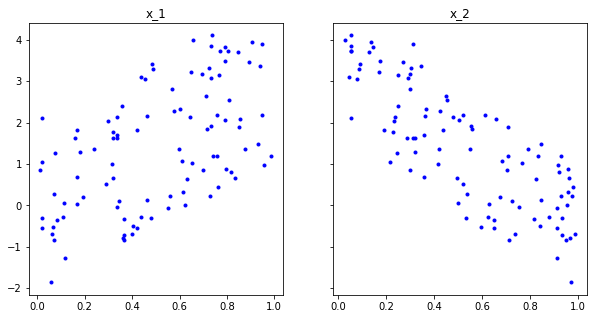

In [46]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)

x1 = np.random.rand(100,1).reshape(100)
x2 = np.random.rand(100,1).reshape(100)
y_randterm = np.random.normal(0,0.2,100)
y = 2+ 3* x1+ -4*x2 + y_randterm

data = np.array([y, x1, x2])
data = np.transpose(data)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
ax1.set_title('x_1')
ax1.plot(x1, y, '.b')
ax2.set_title('x_2')
ax2.plot(x2, y, '.b');

Note that, for our gradients, when having multiple predictors $x_j$ with $j \in 1,\ldots, k$

$$ \frac{dJ}{dm_j}J(m_j,b) = -2\sum_{i = 1}^n x_{j,i}(y_i - (\sum_{j=1}^km{x_{j,i}} + b)) = -2\sum_{i = 1}^n x_{j,i}*\epsilon_i$$
$$ \frac{dJ}{db}J(m_j,b) = -2\sum_{i = 1}^n(y_i - (\sum_{j=1}^km{x_{j,i}} + b)) = -2\sum_{i = 1}^n \epsilon_i $$
    

So we'll have one gradient per predictor along with the gradient for the intercept!

Create the `step_gradient_multi` function below. As we said before, this means that we have more than one feature that we are using as an independent variable in the regression. This function will have the same inputs as `step_gradient`, but it will be able to handle having more than one value for m. It should return the final values for b and m in the form of a tuple.

- `b_current` refers to the y-intercept at the current step
- `m_current` refers to the slope at the current step
- `points` are the data points to which we want to fit a line

You might have to refactor your `error` at function if you want to use it with multiple m values.

In [47]:
def step_gradient_multi(b_current, m_current ,points):
    b_gradient = 0
    m_gradient = np.zeros(len(m_current))
    learning_rate = .1
    N = float(len(points))
    for i in range(0, len(points)):
        y = points[i][0]
        x = points[i][1:(len(m_current)+1)] 
        b_gradient += -(1/N)  * (y -  (sum(m_current * x) + b_current))
        m_gradient += -(1/N) * x * (y -  (sum(m_current * x) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return (new_b, new_m)

Apply 1 step to our data

In [48]:
b = 0
m = [0,0]
updated_b, updated_m = step_gradient_multi(b, m, data) # {'b': 0.0085, 'm': 0.6249999999999999}

Apply 500 steps to our data

In [49]:
# set our initial step with m and b values, and the corresponding error.
b = 0
m = [0,0]
iterations = []
for i in range(500):
    iteration = step_gradient_multi(b, m, data)
    b = iteration[0]
    m = []
    for j in range(len(iteration)):
        m.append(iteration[1][j])
    iterations.append(iteration)

Look at the last step

In [50]:
iterations[499]

(1.944428332442866, array([2.995890, -3.911055]))

## Level up - optional

Try your own gradient descent algorithm on the Boston Housing data set, and compare with the result from scikit learn!
Be careful to test on a few continuous variables at first, and see how you perform. Scikit learn has built-in "regularization" parameters to make optimization more feasible for many parameters.

## Summary

In this section, we saw our gradient descent formulas in action.  The core of the gradient descent functions is understanding the two lines: 

$$ \frac{dJ}{dm}J(m,b) = -2\sum_{i = 1}^n x(y_i - (mx_i + b)) = -2\sum_{i = 1}^n x_i*\epsilon_i$$
$$ \frac{dJ}{db}J(m,b) = -2\sum_{i = 1}^n(y_i - (mx_i + b)) = -2\sum_{i = 1}^n \epsilon_i $$
    
Which both look to the errors of the current regression line for our dataset to determine how to update the regression line next.  These formulas came from our cost function, $J(m,b) = \sum_{i = 1}^n(y_i - (mx_i + b))^2 $, and using the gradient to find the direction of steepest descent.  Translating this into code, and seeing how the regression line continued to improve in alignment with the data, we saw the effectiveness of this technique in practice. Additionally, we saw how you can extend the gradient descent algorithm to multiple predictors.

# Section Recap

## Introduction
​
Congratulations! You have learned about one of the most fundamental concepts at the core machine learning, calculus. In this section, you started with the basics of derivatives and moved all the way to coding out gradient descent with multiple variables. 

## Key Takeaways
​
In this section, we both learned how to traverse a cost function graph to find the local minima to solve a linear regression by using gradient descent and covered some of the foundational calculus that will help you to understand many of the other machine learning models you'll encounter as a professional data scientist. Key takeaways include:
* A derivative is the "instantaneous rate of change" of a function - or it can be thought of as the "slope of the curve" at a point in time
* A derivative can also be thought of as a special case of the rate of change over a period of time - as that period of time is zero. 
* If you calculate the rate of change over a period of time and keep reducing the period of time, it usually tends to a limit - which is the value of that derivative
* The power rule, constant factor rule, and addition rule are key tools for calculating derivatives for various kinds of functions
* The chain rule can be a useful tool for calculating the derivate of composite functions
* A derivative can be useful for identifying local maxima or minima as in both cases, the derivative tends to zero
* A cost curve can be used to plot the values of a cost function (in the case of linear regression) for various values of offset and slope for the best fit line.
* Gradient descent can be used to move towards the local minimum on the cost curve and thus the ideal values for the y-intercept and slope to minimize the selected cost function when performing a linear regression.